In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Предобработка данных

In [2]:
# загрузим тренеровочный датасет
data = pd.read_csv('train.csv')

In [64]:
# оценим размерность датасета
print(f'Количество строк: {data.shape[0]}\nКоличество столбцов: {data.shape[1]}')

Количество строк: 42000
Количество столбцов: 785


In [4]:
# проверим датасет на пропуски
for k, v in enumerate(data.isna().sum()):
    if v != 0:
        print(f'В столбце {data.columns[k]}, {v} пропусков')

In [5]:
# проверить все ли колонки с типом данных int64
for column in data.columns:
    if data[column].dtype != 'int64':
        print( f'Изменить тип данных колонки {column}')

In [6]:
# найдем колонку с целевой переменной
data.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [7]:
# label - колонка с целевой переменной,
# посчитаем количество уникальных значений
for k, v in enumerate(data.label.value_counts(sort=False)):
    print(f'Значение {k} целевой переменной встречается {v} раз')

Значение 0 целевой переменной встречается 4132 раз
Значение 1 целевой переменной встречается 4684 раз
Значение 2 целевой переменной встречается 4177 раз
Значение 3 целевой переменной встречается 4351 раз
Значение 4 целевой переменной встречается 4072 раз
Значение 5 целевой переменной встречается 3795 раз
Значение 6 целевой переменной встречается 4137 раз
Значение 7 целевой переменной встречается 4401 раз
Значение 8 целевой переменной встречается 4063 раз
Значение 9 целевой переменной встречается 4188 раз


In [8]:
# сбалансируем значения целевой переменной
balanced = data.groupby('label')
balance_data = balanced.apply(lambda x: x.sample(balanced.size().min()).reset_index(drop=True))
balance_data['label'].value_counts()

9    3795
8    3795
7    3795
6    3795
5    3795
4    3795
3    3795
2    3795
1    3795
0    3795
Name: label, dtype: int64

In [9]:
# проверим сбалансированный датасет на неизменность пропусков
for k, v in enumerate(balance_data.isna().sum()):
    if v != 0:
        print(f'В столбце {balance_data.columns[k]}, {v} пропусков')
# проверим сбалансированный датасет на неизменность типа данных
for column in balance_data.columns:
    if balance_data[column].dtype != 'int64':
        print( f'Изменить тип данных колонки {column}')


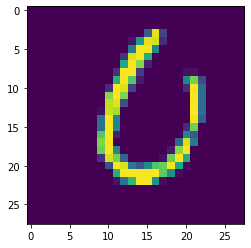

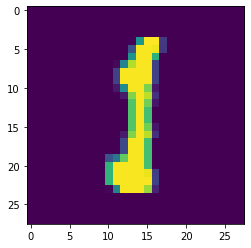

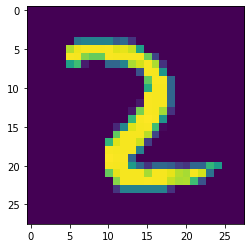

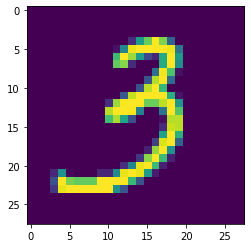

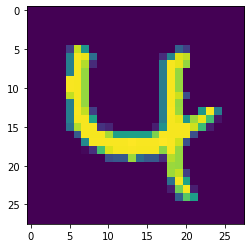

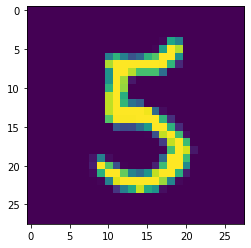

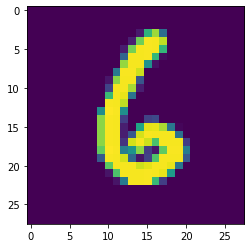

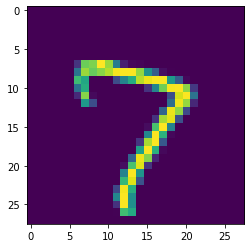

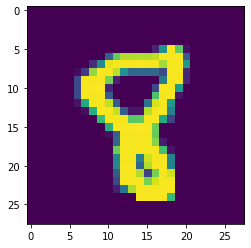

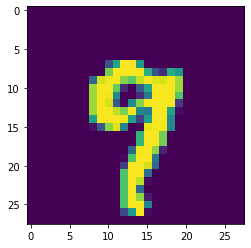

In [10]:
# сравним значение целевой переменной с графическим представлением
# матриц тренировочных данных
for i in range(10):
    image = balance_data[balance_data['label'] == i].iloc[0, 1:]
    plt.imshow(np.array(image).reshape(28,28))
    plt.show()

# Выбор алгоритма для модели

### DecisionTreeClassifier

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns

# разделим обучающую выборку и целевую переменную
X, Y = balance_data.drop(columns='label', axis=1), balance_data['label']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Accuracy DecisionTreeClassifier:  0.8541941150636803


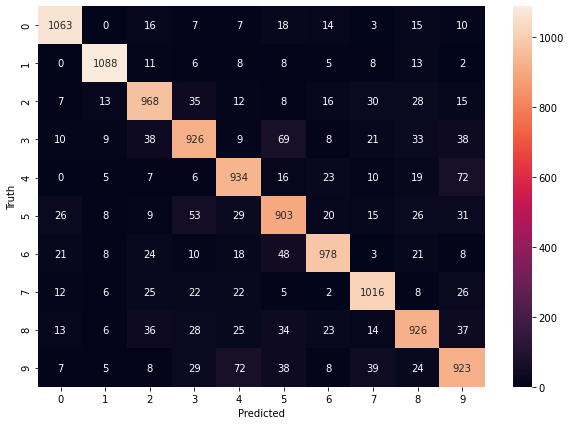

In [13]:
# обучим модель
Tree_model = DecisionTreeClassifier().fit(X_train, y_train)
y_pred = Tree_model.predict(X_test)

# построим матрицу ошибок и получим метрику accuracy
plt.figure(figsize=(10,7))
cmd_tree = confusion_matrix(y_test, y_pred)
sns.heatmap(cmd_tree ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Accuracy DecisionTreeClassifier: ', Tree_model.score(X_test, y_test))

### RandomForest
Алгоритм случайного леса должен повысить точность (Accuracy), поскольку его можно рассматривать как оптимизированную версию алгоритма Decision Tree

In [14]:
from sklearn.ensemble import RandomForestClassifier

In [15]:
# обучим модель
R_forest = RandomForestClassifier()
R_forest.fit(X_train, y_train);

In [16]:
y_pred_forest = R_forest.predict(X_test)

Accuracy RandomForest:  0.9610891523935002


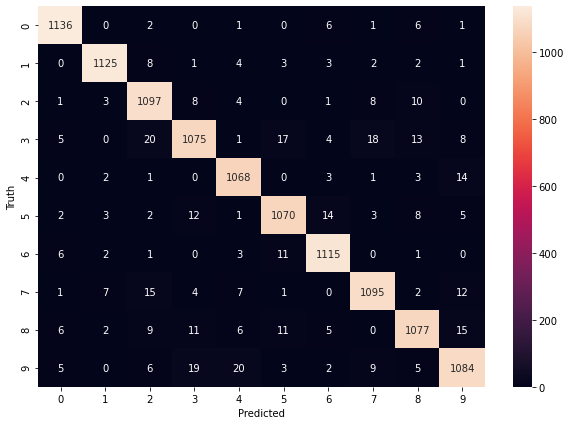

In [17]:
# построим матрицу ошибок и получим метрику accuracy
plt.figure(figsize=(10,7))
cmd_forest = confusion_matrix(y_test, y_pred_forest)
sns.heatmap(cmd_forest ,annot=True , fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')
print('Accuracy RandomForest: ', R_forest.score(X_test, y_test))

### K nearest neighbors (KNN)

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# обучим модель
# knn = KNeighborsClassifier()
# knn.fit(X_train, y_train);

In [19]:
# y_pred_knn = knn.predict(X_test)

In [20]:
# оценим точность 

In [21]:
from sklearn.metrics import precision_score
# precision_score(y_pred_knn, y_test, average=None)

# Подготовка данных для Kaggle

In [22]:
test_data = pd.read_csv('test.csv')

In [58]:
# изучим тестовый датасет
test_data.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
print(f'Количество строк: {test_data.shape[0]}\nКоличество столбцов: {test_data.shape[1]}')

Количество строк: 28000
Количество столбцов: 784


In [25]:
# изучим тестовый результат предсказаний целевой переменной с Kaggle
sample_submission = pd.read_csv('sample_submission.csv')

In [26]:
sample_submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [57]:
# изучим количество уникальных значений
sample_submission['Label'].value_counts()

0    28000
Name: Label, dtype: int64

In [24]:
y_test_data_pred = R_forest.predict(test_data)

In [28]:
# преобразуем DataFrame с предсказаниями в формат csv для Kaggle
data_submission = {'ImageId': [int(i) for i in range(1,len(y_test_data_pred)+1)],
                    'Label': y_test_data_pred}

In [29]:
submission = pd.DataFrame(data_submission)
submission.to_csv('submission.csv', index=False) # Public Score 0.95982

# Подбор оптимальных гиперпараметров RandomForest

In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

1.0

### Шаг 1: оптимизация гипермараметров с RandomizedSearchCV

In [36]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['log2', 'sqrt']
max_depth = [int(x) for x in np.linspace(start = 1, stop = 15, num = 15)]
min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
min_samples_leaf = [int(x) for x in np.linspace(start = 2, stop = 50, num = 10)]
bootstrap = [True, False]
param_dist = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rs = RandomizedSearchCV(R_forest, 
                        param_dist, 
                        n_iter = 100, 
                        cv = 3, 
                        verbose = 1, 
                        n_jobs=-1, 
                        random_state=0)
rs.fit(X_train, y_train)
rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   58.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 10.4min finished


{'n_estimators': 700,
 'min_samples_split': 12,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 13,
 'bootstrap': False}

Получим DataFrame, содержащий результаты работы алгоритма RandomizedSearchCV

In [68]:
RSCV_df = pd.DataFrame(rs.cv_results_).sort_values('rank_test_score').reset_index(drop=True)
RSCV_df.drop([
            'mean_fit_time', 
            'std_fit_time', 
            'mean_score_time',
            'std_score_time', 
            'params', 
            'split0_test_score', 
            'split1_test_score', 
            'split2_test_score', 
            'std_test_score'], 
            axis = 1)
RSCV_df.head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,93.131221,4.794811,2.372394,0.228134,700,12,2,sqrt,13,False,"{'n_estimators': 700, 'min_samples_split': 12,...",0.956748,0.953134,0.954150,0.954677,0.001522,1
1,55.216471,0.948824,1.208922,0.012256,400,23,2,sqrt,14,False,"{'n_estimators': 400, 'min_samples_split': 23,...",0.954715,0.950423,0.953021,0.952720,0.001765,2
2,79.210886,2.830713,1.946061,0.066401,600,23,2,sqrt,15,False,"{'n_estimators': 600, 'min_samples_split': 23,...",0.954263,0.950536,0.952456,0.952419,0.001522,3
3,31.796183,1.865720,2.422090,0.283178,700,23,7,log2,15,False,"{'n_estimators': 700, 'min_samples_split': 23,...",0.949181,0.946358,0.946019,0.947186,0.001418,4
4,20.084519,0.455211,2.105756,0.052974,700,2,2,log2,11,True,"{'n_estimators': 700, 'min_samples_split': 2, ...",0.944664,0.943083,0.943309,0.943685,0.000698,5
5,55.809347,0.085161,1.468895,0.109849,500,12,18,sqrt,13,False,"{'n_estimators': 500, 'min_samples_split': 12,...",0.944777,0.939243,0.942405,0.942142,0.002267,6
6,11.160011,0.218161,0.299704,0.006135,100,2,18,sqrt,15,False,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.942970,0.939130,0.940937,0.941013,0.001568,7
7,54.912659,0.878924,1.083050,0.112988,800,28,12,sqrt,14,True,"{'n_estimators': 800, 'min_samples_split': 28,...",0.941728,0.938340,0.942180,0.940749,0.001714,8
8,69.184105,1.072102,2.643190,0.122969,1000,12,7,sqrt,10,True,"{'n_estimators': 1000, 'min_samples_split': 12...",0.941841,0.937888,0.940260,0.939996,0.001624,9
9,64.343629,1.466477,1.609400,0.018683,600,50,23,sqrt,14,False,"{'n_estimators': 600, 'min_samples_split': 50,...",0.939808,0.936872,0.940034,0.938905,0.001440,10


Создадим столбчатые графики. 
По оси X расположены значения гиперпараметров. По оси Y расположены средние значения, показываемые моделями

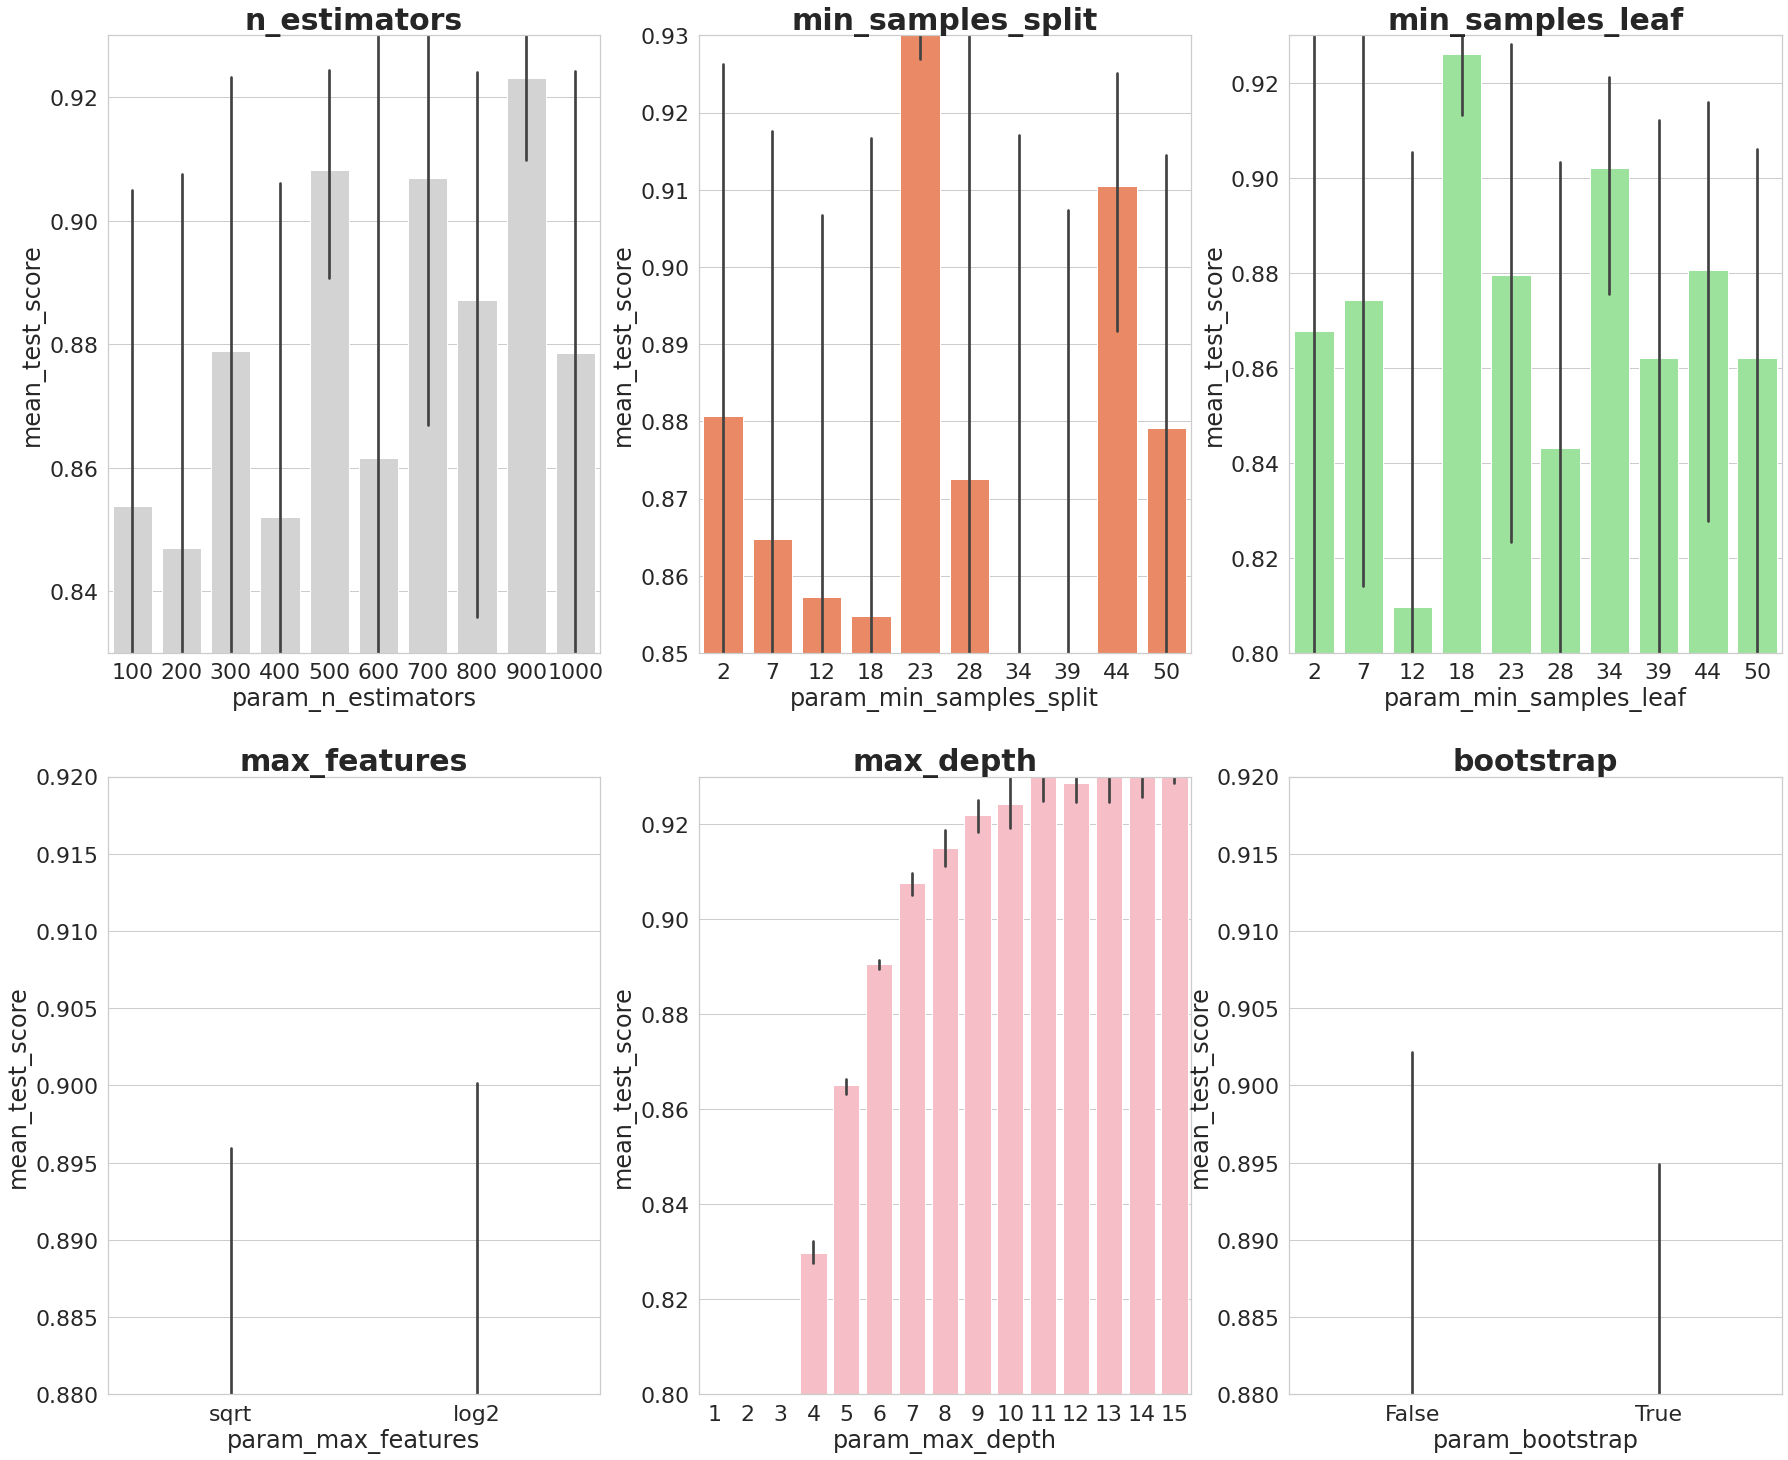

In [78]:
fig, axs = plt.subplots(ncols=3, nrows=2)
sns.set(style="whitegrid", color_codes=True, font_scale = 2)
fig.set_size_inches(30,25)
sns.barplot(x='param_n_estimators', y='mean_test_score', data=RSCV_df, ax=axs[0,0], color='lightgrey')
axs[0,0].set_ylim([.83,.93])
axs[0,0].set_title(label = 'n_estimators', size=30, weight='bold')
sns.barplot(x='param_min_samples_split', y='mean_test_score', data=RSCV_df, ax=axs[0,1], color='coral')
axs[0,1].set_ylim([.85,.93])
axs[0,1].set_title(label = 'min_samples_split', size=30, weight='bold')
sns.barplot(x='param_min_samples_leaf', y='mean_test_score', data=RSCV_df, ax=axs[0,2], color='lightgreen')
axs[0,2].set_ylim([.80,.93])
axs[0,2].set_title(label = 'min_samples_leaf', size=30, weight='bold')
sns.barplot(x='param_max_features', y='mean_test_score', data=RSCV_df, ax=axs[1,0], color='wheat')
axs[1,0].set_ylim([.88,.92])
axs[1,0].set_title(label = 'max_features', size=30, weight='bold')
sns.barplot(x='param_max_depth', y='mean_test_score', data=RSCV_df, ax=axs[1,1], color='lightpink')
axs[1,1].set_ylim([.80,.93])
axs[1,1].set_title(label = 'max_depth', size=30, weight='bold')
sns.barplot(x='param_bootstrap',y='mean_test_score', data=RSCV_df, ax=axs[1,2], color='skyblue')
axs[1,2].set_ylim([.88,.92])
axs[1,2].set_title(label = 'bootstrap', size=30, weight='bold')
plt.show()

### Шаг 2: GridSearchCV (окончательная подготовка параметров для финальной модели)

In [44]:
from sklearn.model_selection import GridSearchCV

In [79]:
n_estimators = [500,700,900]
min_samples_split = [23,44]
min_samples_leaf = [18,34]
max_features = ['log2']
max_depth = [11,13,14,15]
bootstrap = [False]

param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

gs = GridSearchCV(R_forest, param_grid, cv = 3, verbose = 1, n_jobs=-1)
gs.fit(X_train, y_train)
rfc3 = gs.best_estimator_
gs.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  6.0min finished


{'bootstrap': False,
 'max_depth': 14,
 'max_features': 'log2',
 'min_samples_leaf': 18,
 'min_samples_split': 23,
 'n_estimators': 700}

### Обучим модель на найденных гиперпараметрах

In [80]:
R_forest_optimize = RandomForestClassifier(bootstrap=False, max_depth=14, max_features='log2', min_samples_leaf=18, min_samples_split=23, n_estimators=700)

In [86]:
R_forest_optimize.fit(X_train, y_train);

In [87]:
y_pred2 = R_forest_optimize.predict(test_data) 

In [88]:
# подготовим данные для Kaggle
data_submission = {'ImageId': [int(i) for i in range(1,len(y_test_data_pred)+1)],
                    'Label': y_pred2}

In [89]:
submission = pd.DataFrame(data_submission)
submission.to_csv('submission.csv', index=False)